In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r'Sales Data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,5097.500000,228.225854,3.791838,0.155385,28.673417
std,2942.898656,619.906839,2.228317,0.206249,232.465115
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2549.250000,17.220000,2.000000,0.000000,1.760800
50%,5097.500000,53.910000,3.000000,0.200000,8.690000
75%,7645.750000,209.500000,5.000000,0.200000,29.297925
max,10194.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

In [8]:
df.shape

(10194, 21)

In [9]:
df['Country/Region'].unique()

array(['United States', 'Canada'], dtype=object)

#### Dalam kasus ini saya hanya fokus ke Country/Region = United States didalam dataset ini.

In [10]:
df_us = df[df['Country/Region']== 'United States']

In [11]:
df_us.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [12]:
df_us.shape

(9994, 21)

In [13]:
ship_mode = df_us['Ship Mode'].value_counts().reset_index()
ship_mode.columns = ['Ship Mode', 'Count']
ship_mode

,Ship Mode,Count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


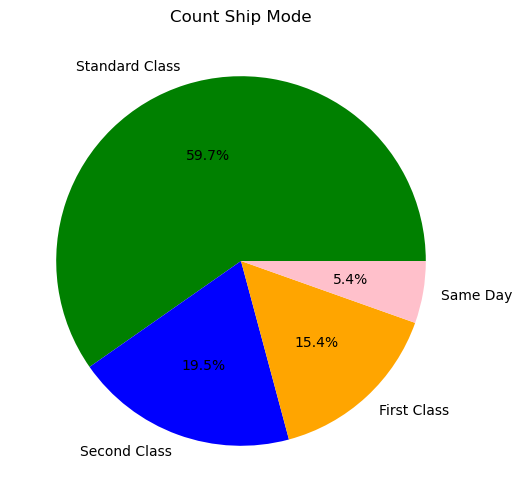

In [14]:
shipmode_count = ship_mode['Count']
nama_shipmode = ship_mode['Ship Mode']

plt.figure(figsize=(6, 6))
plt.pie(shipmode_count, labels=nama_shipmode, colors=["green", "blue", "orange", "pink"], autopct='%1.1f%%')
plt.title("Count Ship Mode", loc="center")
plt.show()

In [15]:
segment = df_us['Segment'].value_counts().reset_index()
segment.columns = ['Segment', 'Count']
segment

,Segment,Count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


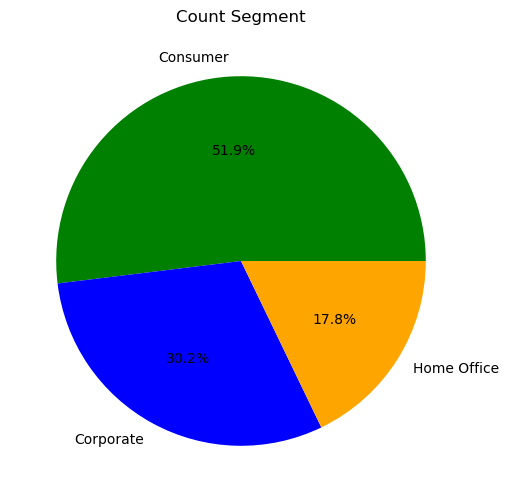

In [16]:
segment_count = segment['Count']
segment_name = segment['Segment']

plt.figure(figsize=(6, 6))
plt.pie(segment_count, labels=segment_name, colors=["green", "blue", "orange"], autopct='%1.1f%%')
plt.title("Count Segment", loc="center")
plt.show()

In [17]:
region = df_us['Region'].value_counts().reset_index()
region.columns = ['Region', 'Count']
region

,Region,Count
0,West,3203
1,East,2848
2,Central,2323
3,South,1620


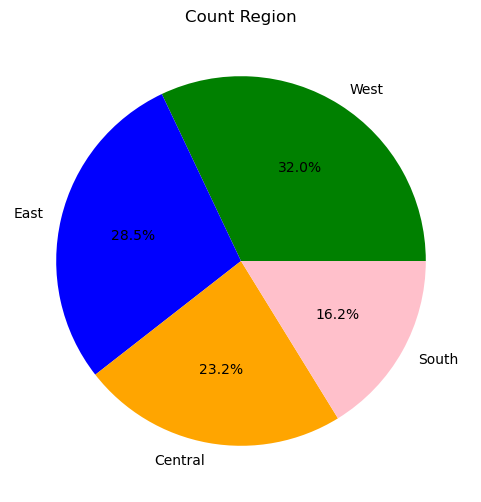

In [18]:
region_count = region['Count']
region_name = region['Region']

plt.figure(figsize=(6, 6))
plt.pie(region_count, labels=region_name, colors=["green", "blue", "orange", "pink"], autopct='%1.1f%%')
plt.title("Count Region", loc="center")
plt.show()

In [19]:
orderdate_sales = df_us.groupby(pd.to_datetime(df_us['Order Date']).dt.strftime('%Y-%m'))['Sales'].sum().reset_index(name = 'total')
orderdate_sales

,Order Date,total
0,2019-01,14236.8950
1,2019-02,4519.8920
2,2019-03,55691.0090
3,2019-04,28295.3450
4,2019-05,23648.2870
5,2019-06,34595.1276
6,2019-07,33946.3930
7,2019-08,27909.4685
8,2019-09,81777.3508
9,2019-10,31453.3930


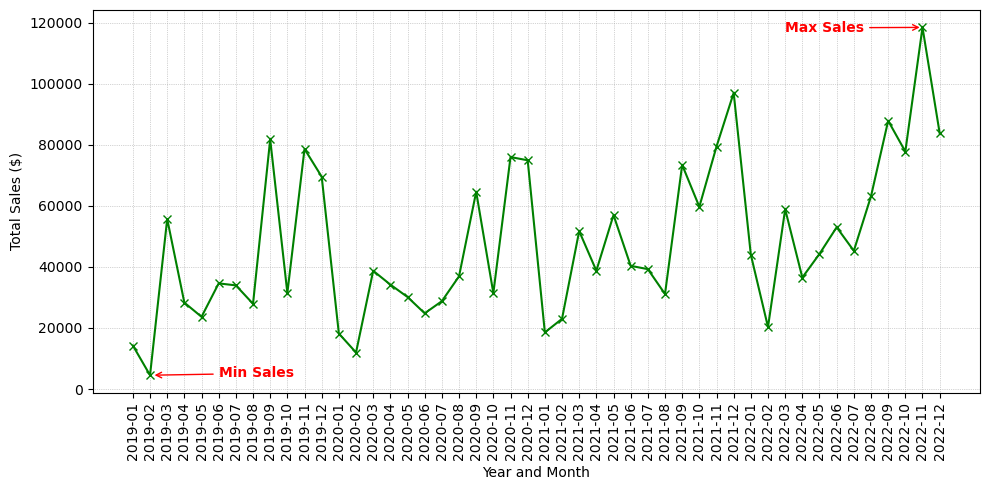

In [20]:
plt.figure(figsize = (15,5))
plt.plot(orderdate_sales['Order Date'], orderdate_sales['total'], marker = 'x', color = 'green')
plt.ylabel("Total Sales ($)", fontsize = 10)
plt.xlabel("Year and Month", fontsize = 10)
plt.grid(color = "darkgray", linestyle=":", linewidth=0.5)
plt.xticks(rotation = 90)
plt.annotate("Max Sales", xy=(46, 118447), xytext = (38,117000),
            color = "red", weight = "bold",
            arrowprops = dict(
            arrowstyle = "->",
            connectionstyle = "arc3",
            color = "red"))
plt.annotate("Min Sales", xy=(1.1, 4519), xytext = (5,3800),
            color = "red", weight = "bold",
            arrowprops = dict(
            arrowstyle = "->",
            connectionstyle = "arc3",
            color = "red"))

plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

In [21]:
orderdate_profit = df_us.groupby(pd.to_datetime(df_us['Order Date']).dt.strftime('%Y-%m'))['Profit'].sum().reset_index(name = 'total')
orderdate_profit

,Order Date,total
0,2019-01,2450.1907
1,2019-02,862.3084
2,2019-03,498.7299
3,2019-04,3488.8352
4,2019-05,2738.7096
5,2019-06,4976.5244
6,2019-07,-841.4826
7,2019-08,5318.1050
8,2019-09,8328.0994
9,2019-10,3448.2573


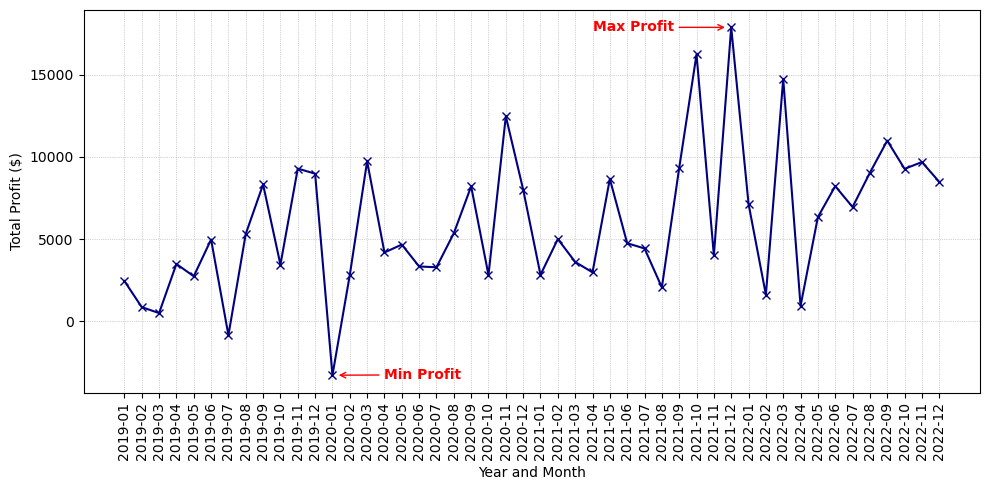

In [22]:
plt.figure(figsize = (15,5))
plt.plot(orderdate_profit['Order Date'], orderdate_profit['total'], marker = 'x', color = 'navy')
plt.ylabel("Total Profit ($)", fontsize = 10)
plt.xlabel("Year and Month", fontsize = 10)
plt.grid(color = "darkgray", linestyle=":", linewidth=0.5)
plt.xticks(rotation = 90)
plt.annotate("Max Profit", xy=(34.8, 17885), xytext = (27,17650),
            color = "red", weight = "bold",
            arrowprops = dict(
            arrowstyle = "->",
            connectionstyle = "arc3",
            color = "red"))
plt.annotate("Min Profit", xy=(12.2, -3281), xytext = (15,-3500),
            color = "red", weight = "bold",
            arrowprops = dict(
            arrowstyle = "->",
            connectionstyle = "arc3",
            color = "red"))

plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

In [23]:
df_us.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [24]:
shipmode_sales = df_us.groupby('Ship Mode')['Sales'].sum().reset_index(name = 'total').sort_values('total', ascending = False)
shipmode_sales.style.background_gradient(cmap = 'Greens')

,Ship Mode,total
3,Standard Class,1358215.743000
2,Second Class,459193.569400
0,First Class,351428.422900
1,Same Day,128363.125000


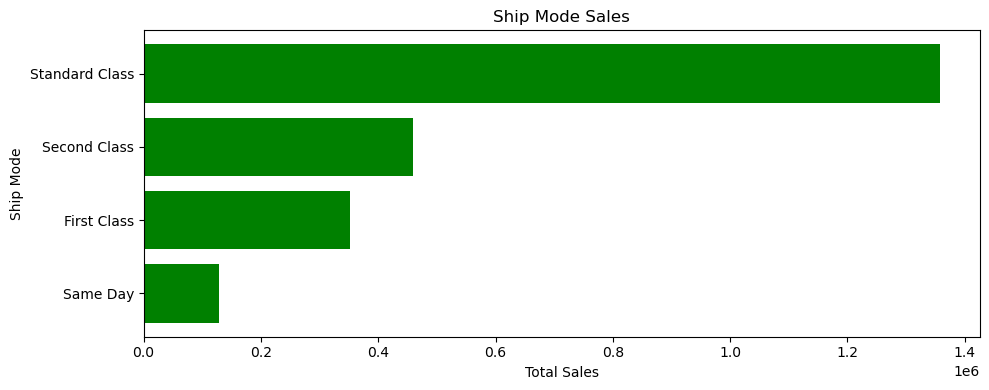

In [25]:
plt.figure(figsize=(10, 4))
plt.barh(shipmode_sales['Ship Mode'], shipmode_sales['total'], color='green')
plt.title("Ship Mode Sales", fontsize = 12)
plt.xlabel("Total Sales", fontsize = 10)
plt.ylabel("Ship Mode", fontsize = 10)
plt.tight_layout()
# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()
plt.show()

In [26]:
shipmode_profit = df_us.groupby('Ship Mode')['Profit'].sum().reset_index(name = 'total').sort_values('total', ascending = False)
shipmode_profit.style.background_gradient(cmap = 'Blues')

,Ship Mode,total
3,Standard Class,164088.787500
2,Second Class,57446.635400
0,First Class,48969.839900
1,Same Day,15891.758900


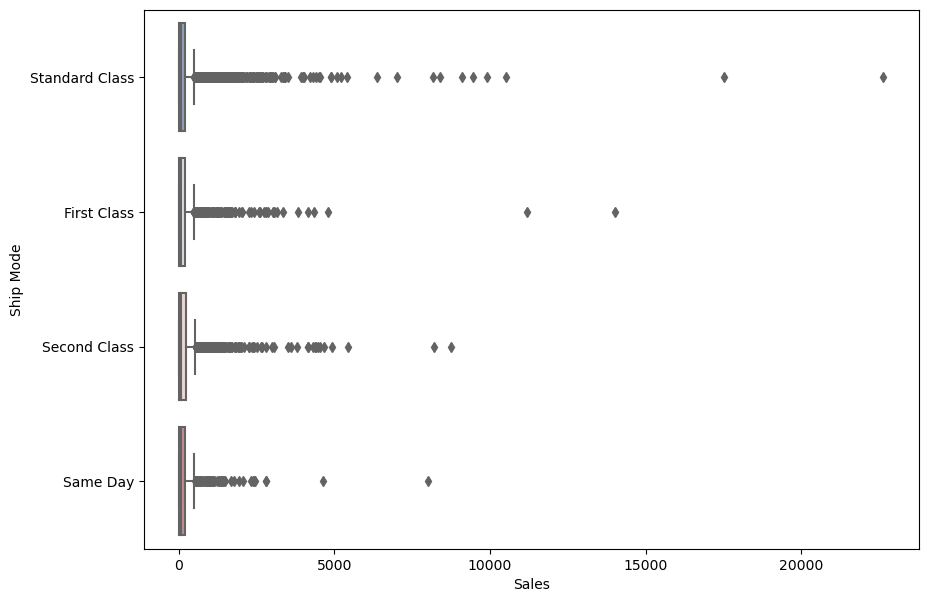

In [27]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Sales', y = 'Ship Mode', data = df_us, palette = 'vlag')
plt.show()

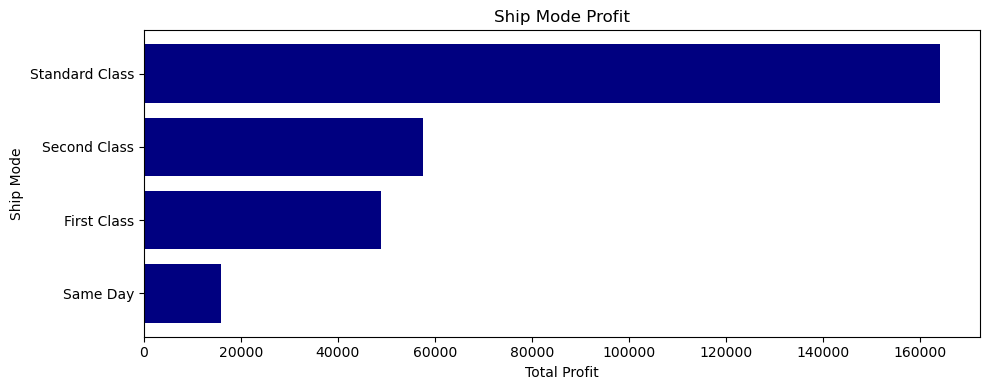

In [28]:
plt.figure(figsize=(10, 4))
plt.barh(shipmode_profit['Ship Mode'], shipmode_profit['total'], color='navy')
plt.title("Ship Mode Profit", fontsize = 12)
plt.xlabel("Total Profit", fontsize = 10)
plt.ylabel("Ship Mode", fontsize = 10)
plt.tight_layout()
# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()
plt.show()

In [29]:
segment_sales = df_us.groupby('Segment')['Sales'].sum().reset_index(name = 'total').sort_values('total', ascending = False)
segment_sales.style.background_gradient(cmap = 'Greens')

,Segment,total
0,Consumer,1161401.345000
1,Corporate,706146.366800
2,Home Office,429653.148500


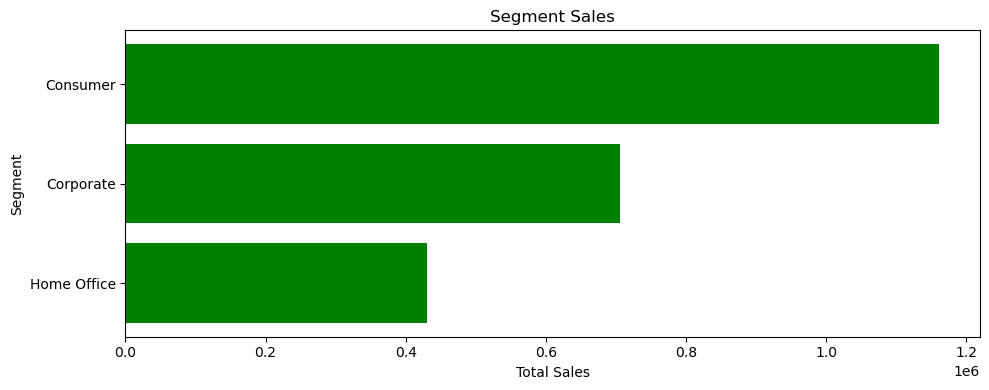

In [30]:
plt.figure(figsize=(10, 4))
plt.barh(segment_sales['Segment'], segment_sales['total'], color='green')
plt.title("Segment Sales", fontsize = 12)
plt.xlabel("Total Sales", fontsize = 10)
plt.ylabel("Segment", fontsize = 10)
plt.tight_layout()
# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()
plt.show()

In [31]:
segment_profit = df_us.groupby('Segment')['Profit'].sum().reset_index(name = 'total').sort_values('total', ascending = False)
segment_profit.style.background_gradient(cmap = 'Blues')

,Segment,total
0,Consumer,134119.209200
1,Corporate,91979.134000
2,Home Office,60298.678500


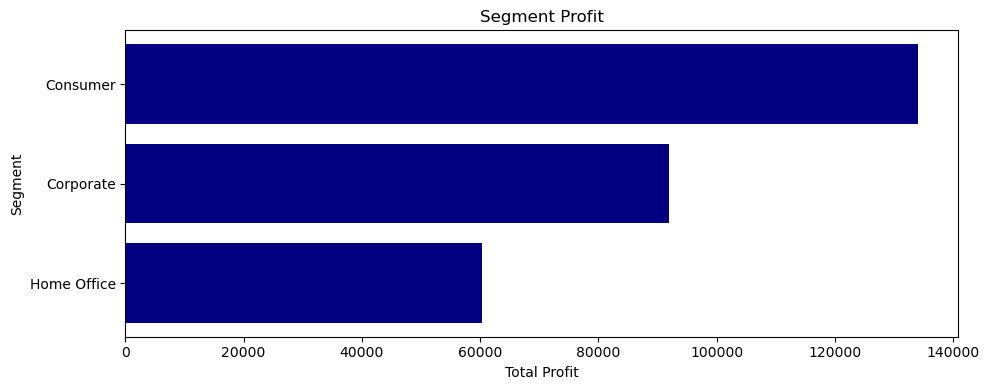

In [32]:
plt.figure(figsize=(10, 4))
plt.barh(segment_profit['Segment'], segment_profit['total'], color='navy')
plt.title("Segment Profit", fontsize = 12)
plt.xlabel("Total Profit", fontsize = 10)
plt.ylabel("Segment", fontsize = 10)
plt.tight_layout()
# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()
plt.show()

In [33]:
category_sales = df_us.groupby('Category')['Sales'].sum().reset_index(name = 'total').sort_values('total', ascending = False)
category_sales.style.background_gradient(cmap = 'Greens')

,Category,total
2,Technology,836154.033000
0,Furniture,741999.795300
1,Office Supplies,719047.032000


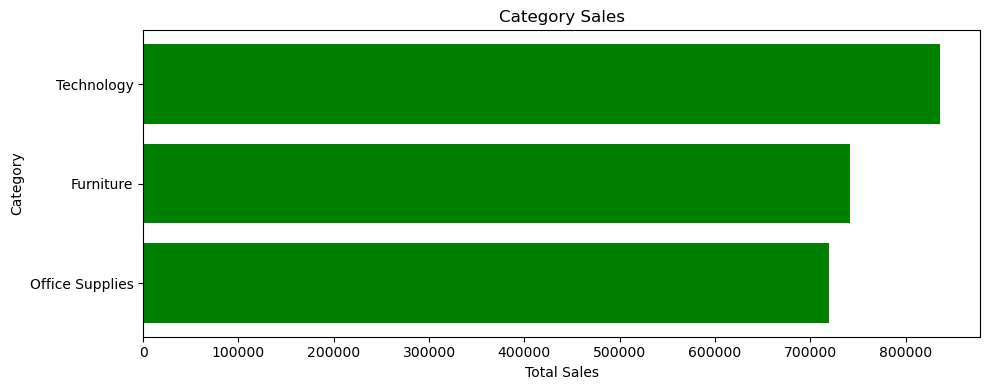

In [34]:
plt.figure(figsize=(10, 4))
plt.barh(category_sales['Category'], category_sales['total'], color='green')
plt.title("Category Sales", fontsize = 12)
plt.xlabel("Total Sales", fontsize = 10)
plt.ylabel("Category", fontsize = 10)
plt.tight_layout()
# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()
plt.show()

In [35]:
category_profit = df_us.groupby('Category')['Profit'].sum().reset_index(name = 'total').sort_values('total', ascending = False)
category_profit.style.background_gradient(cmap = 'Blues')

,Category,total
2,Technology,145454.948100
1,Office Supplies,122490.800800
0,Furniture,18451.272800


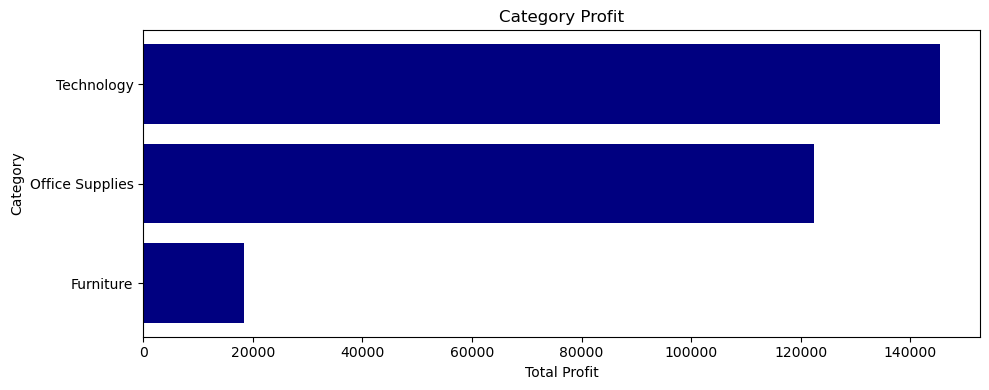

In [36]:
plt.figure(figsize=(10, 4))
plt.barh(category_profit['Category'], category_profit['total'], color='navy')
plt.title("Category Profit", fontsize = 12)
plt.xlabel("Total Profit", fontsize = 10)
plt.ylabel("Category", fontsize = 10)
plt.tight_layout()
# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()
plt.show()

In [37]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [38]:
region_sales = df_us.groupby('Region')['Sales'].sum().reset_index(name = 'total').sort_values('total', ascending = False)
region_sales.style.background_gradient(cmap = 'Greens')

,Region,total
3,West,725457.824500
1,East,678781.240000
0,Central,501239.890800
2,South,391721.905000


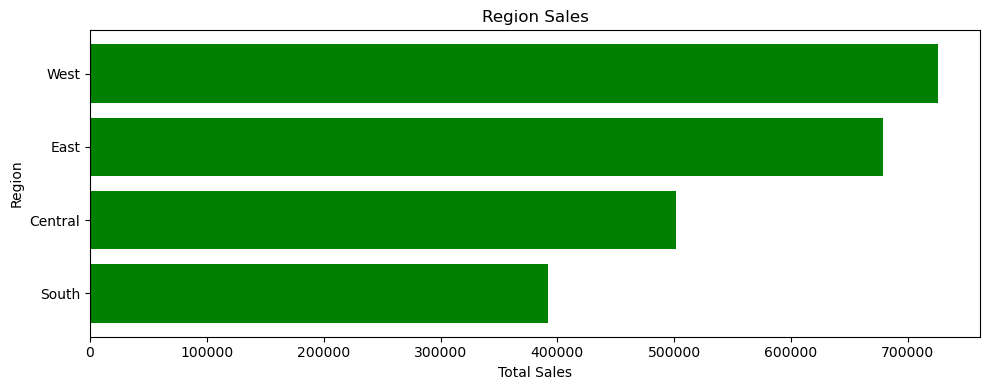

In [39]:
plt.figure(figsize=(10, 4))
plt.barh(region_sales['Region'], region_sales['total'], color='green')
plt.title("Region Sales", fontsize = 12)
plt.xlabel("Total Sales", fontsize = 10)
plt.ylabel("Region", fontsize = 10)
plt.tight_layout()
# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()
plt.show()

In [40]:
region_profit = df_us.groupby('Region')['Profit'].sum().reset_index(name = 'total').sort_values('total', ascending = False)
region_profit.style.background_gradient(cmap = 'Blues')

,Region,total
3,West,108418.448900
1,East,91522.780000
2,South,46749.430300
0,Central,39706.362500


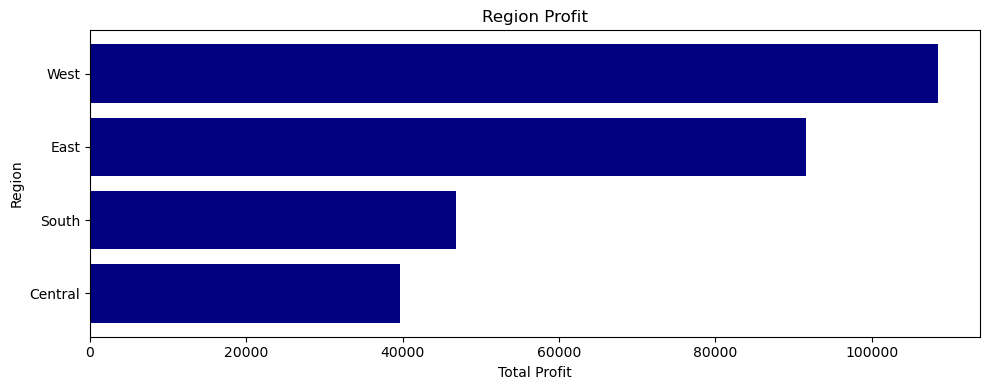

In [41]:
plt.figure(figsize=(10, 4))
plt.barh(region_profit['Region'], region_profit['total'], color='navy')
plt.title("Region Profit", fontsize = 12)
plt.xlabel("Total Profit", fontsize = 10)
plt.ylabel("Region", fontsize = 10)
plt.tight_layout()
# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()
plt.show()

#### Modelling

Forecasting by Sales - Superstore

In [42]:
orderdate_sales

,Order Date,total
0,2019-01,14236.8950
1,2019-02,4519.8920
2,2019-03,55691.0090
3,2019-04,28295.3450
4,2019-05,23648.2870
5,2019-06,34595.1276
6,2019-07,33946.3930
7,2019-08,27909.4685
8,2019-09,81777.3508
9,2019-10,31453.3930


Saya akan menggunakan data dari variable "orderdate_sales" yang sudah saya konversi atau groupby bulan dan tahun "Order Date". kolom total adalah hasil aggregasi kolom Order Date SUM by Sales.

In [43]:
print("Baris data : ", orderdate_sales.shape[0])
print("Kolom data : ", orderdate_sales.shape[1])

Baris data :  48
Kolom data :  2


In [44]:
print(f"Date range of Sales available from {orderdate_sales.loc[:, 'Order Date'][0]} to {orderdate_sales.loc[:, 'Order Date'][len(orderdate_sales)-1]}")

Date range of Sales available from 2019-01 to 2022-12


In [45]:
date = pd.date_range(start = '01/01/2019', end = '31/12/2022', freq = 'M')
date

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [46]:
orderdate_sales['date'] = date
orderdate_sales.drop('Order Date', axis = 1, inplace = True)
orderdate_sales = orderdate_sales.set_index('date')
orderdate_sales

,total
date,
2019-01-31,14236.8950
2019-02-28,4519.8920
2019-03-31,55691.0090
2019-04-30,28295.3450
2019-05-31,23648.2870
2019-06-30,34595.1276
2019-07-31,33946.3930
2019-08-31,27909.4685
2019-09-30,81777.3508


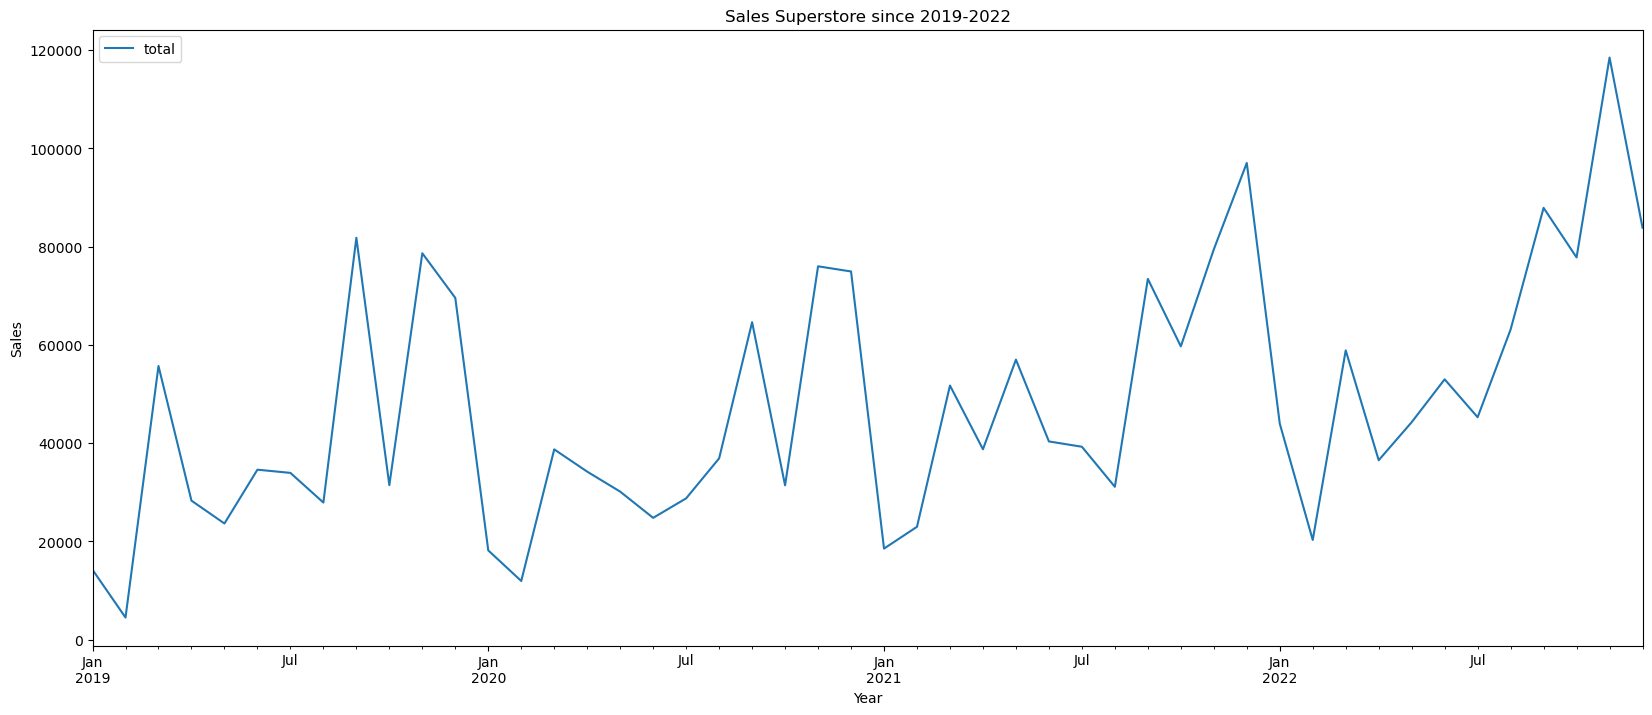

In [47]:
orderdate_sales.plot(figsize = (20,8))
plt.title("Sales Superstore since 2019-2022")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [48]:
round(orderdate_sales.describe(), 3)

,total
count,48.000
mean,47858.351
std,25195.891
min,4519.892
25%,29790.096
50%,39803.248
75%,65833.344
max,118447.825


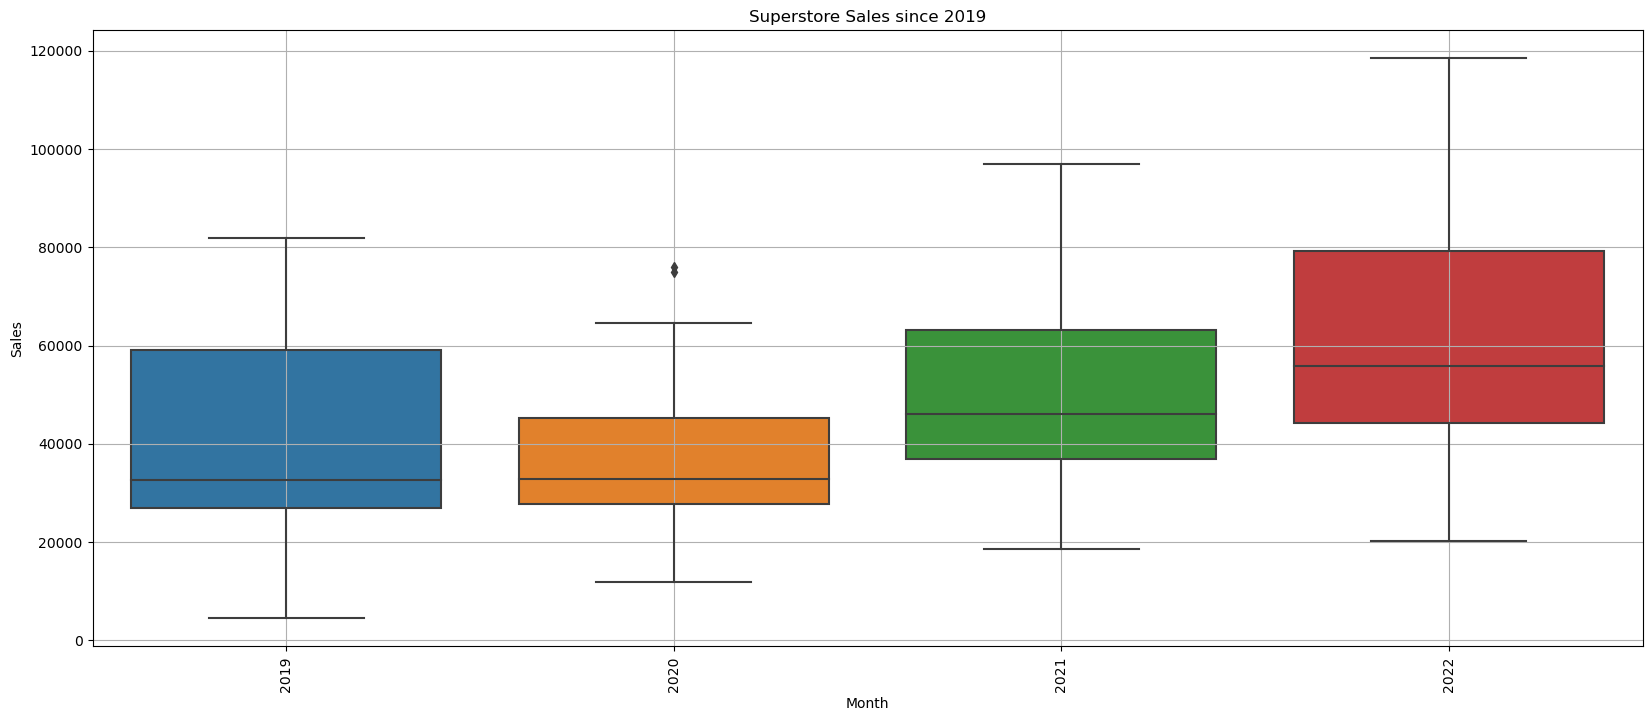

In [49]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = orderdate_sales.index.year, y = orderdate_sales.values[:,0], ax = ax)
plt.title("Superstore Sales since 2019")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation = 90)
plt.grid()

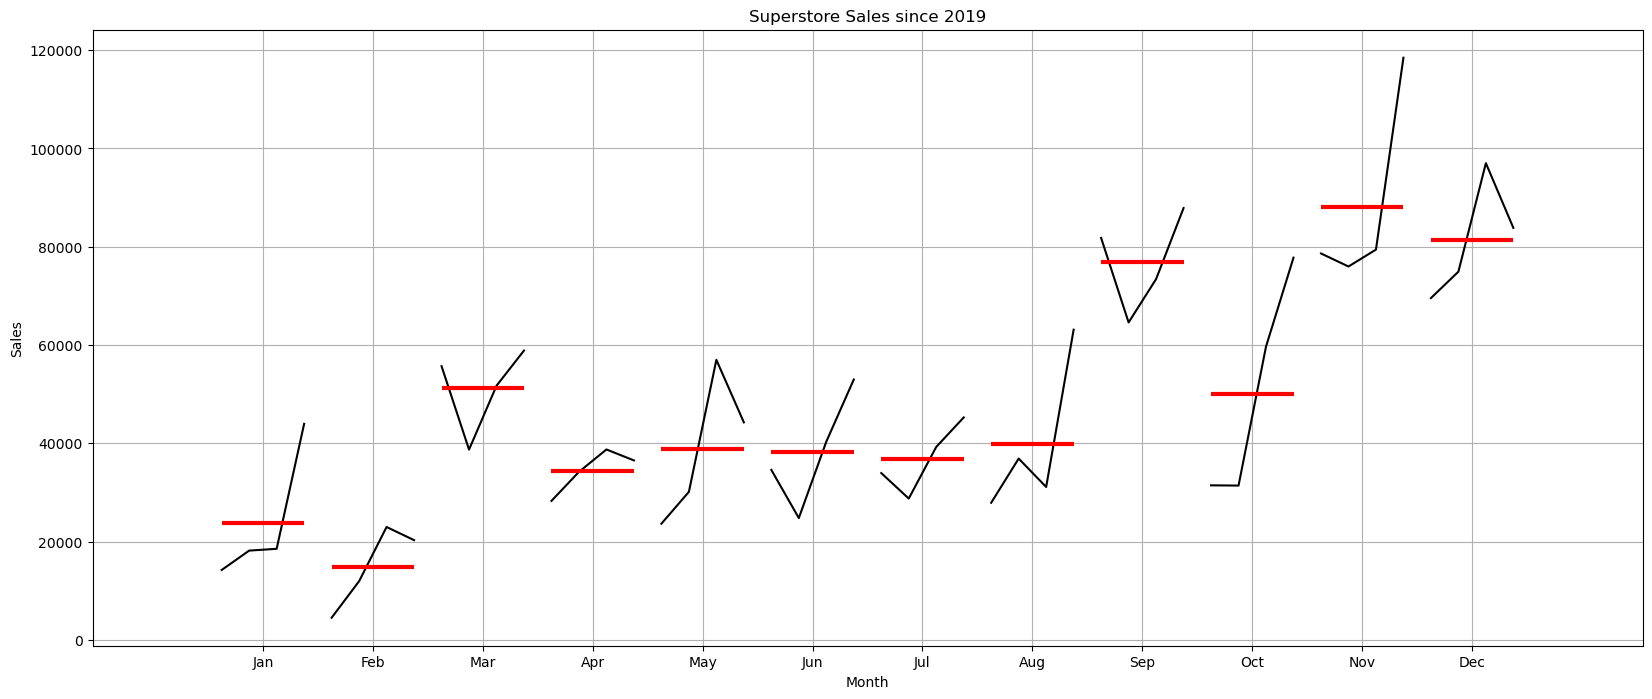

In [50]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(20,8))
month_plot(orderdate_sales, ylabel = 'Sales', ax = ax)
plt.title('Superstore Sales since 2019')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()

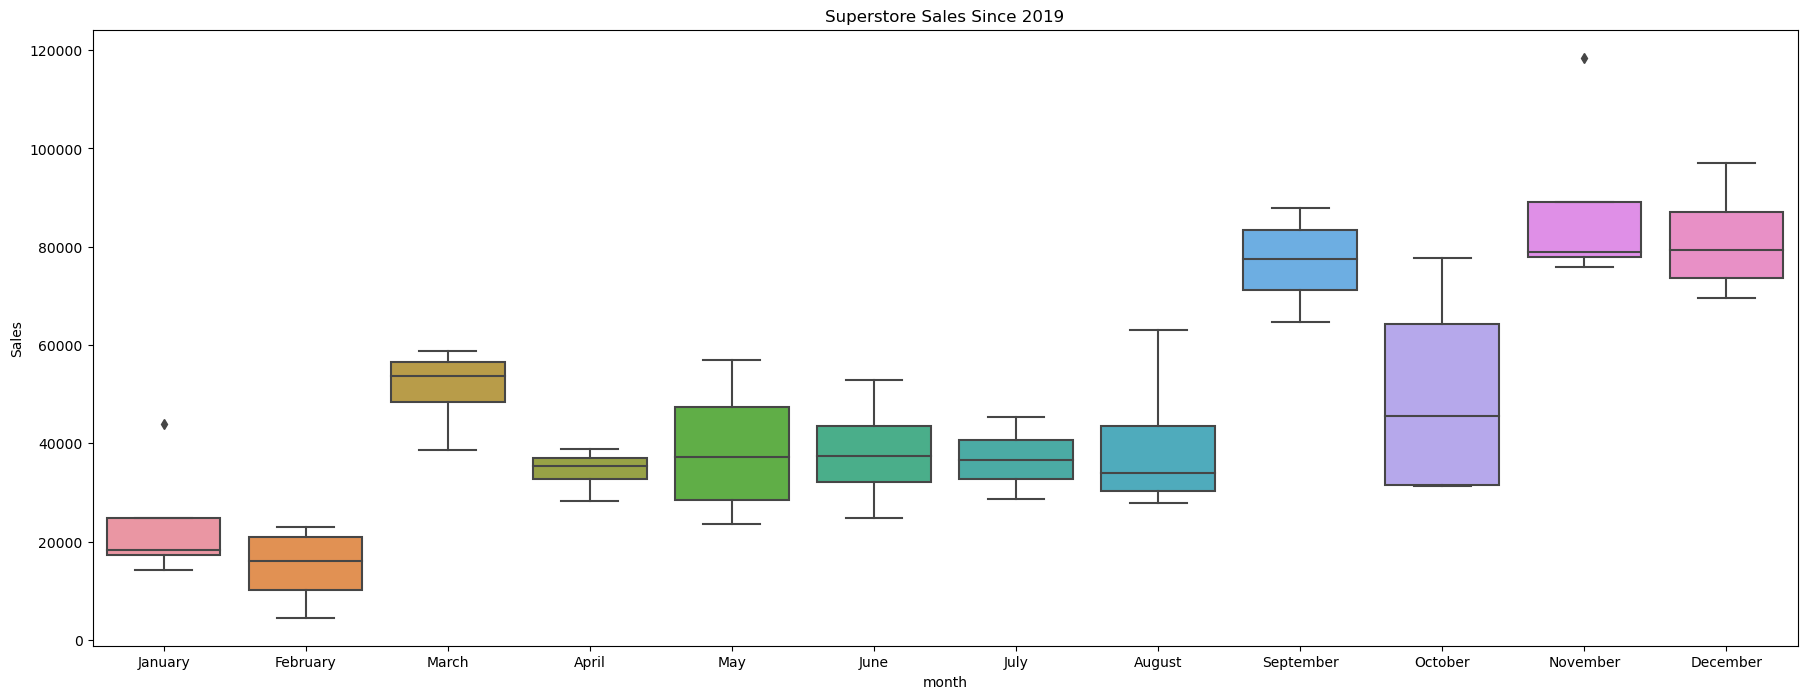

In [51]:
fig, ax = plt.subplots(figsize = (22,8))
sns.boxplot(x = orderdate_sales.index.month_name(), y = orderdate_sales.values[:, 0], ax = ax)
plt.title("Superstore Sales Since 2019")
plt.xlabel("month")
plt.ylabel("Sales")
plt.show()

In [52]:
koef_var_sales = orderdate_sales.groupby(orderdate_sales.index.year).mean().rename(columns = {'total':'Mean'})
koef_var_sales['Std'] = orderdate_sales.groupby(orderdate_sales.index.year).std().rename(columns = {'total':'Std'})
koef_var_sales['Cov_pct'] = ((koef_var_sales['Std']/koef_var_sales['Mean'])*100).round(2)
koef_var_sales

,Mean,Std,Cov_pct
date,,,
2019,40353.958175,25167.096426,62.37
2020,39211.042417,21207.888596,54.09
2021,50767.133167,23687.375959,46.66
2022,61101.271267,26919.532133,44.06


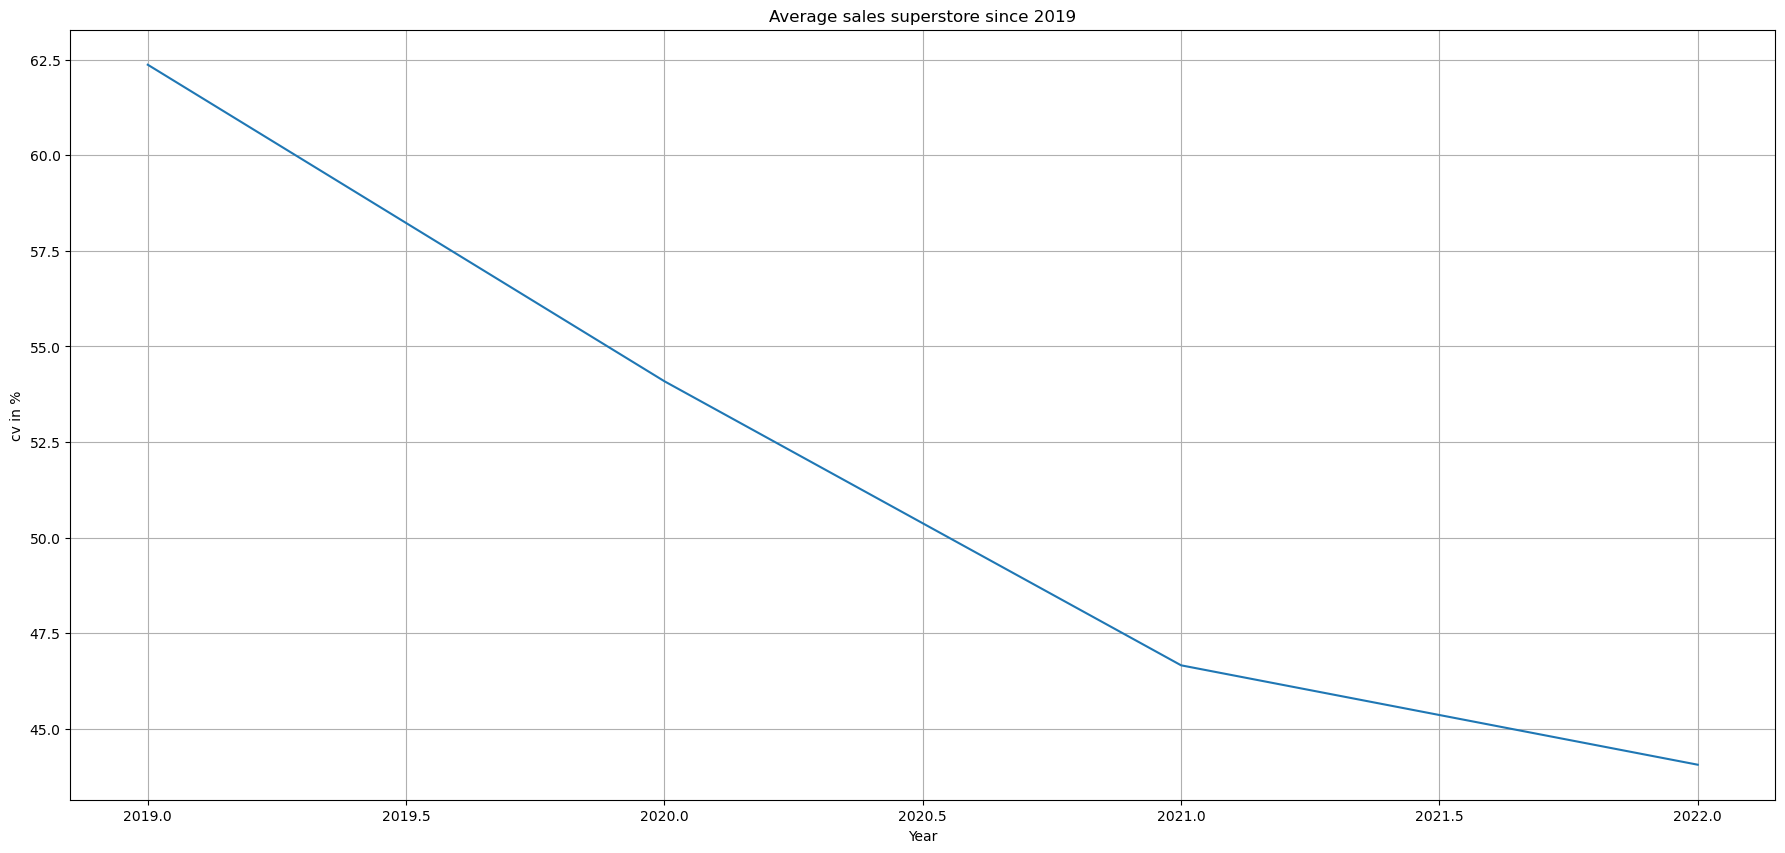

In [53]:
fig, ax = plt.subplots(figsize = (22,10))
koef_var_sales['Cov_pct'].plot();
plt.title('Average sales superstore since 2019')
plt.xlabel('Year')
plt.ylabel('cv in %')
plt.grid()

Pada visualisasi diatas, ini ada representasi nilai dari koefisien variasi tiap tahunnya yang bertujuannya untuk melihat seberapa bervariasinya nilai koefisien tiap tahunnya. Pada kasus Sales Superstore, 2019 adalah tahun penjualan Superstore yang memiliki variasi nilai yang sangat tinggi. Namun nilai koefisien variasi ini terus menurun hingga tahun 2022.

### Modeling

In [54]:
train = orderdate_sales[orderdate_sales.index.year <= 2021]
test = orderdate_sales[orderdate_sales.index.year == 2022]

In [55]:
print(train.shape)
print(test.shape)

(36, 1)
(12, 1)


In [56]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(36, 12)

In [57]:
lr_train = train.copy()
lr_test = test.copy()

lr_train['time'] = train_time
lr_test['time'] = test_time

In [58]:
lr_train

,total,time
date,,
2019-01-31,14236.8950,1
2019-02-28,4519.8920,2
2019-03-31,55691.0090,3
2019-04-30,28295.3450,4
2019-05-31,23648.2870,5
2019-06-30,34595.1276,6
2019-07-31,33946.3930,7
2019-08-31,27909.4685,8
2019-09-30,81777.3508,9


In [59]:
x_train = np.array(lr_train['time']).reshape(-1,1)
y_train = np.array(lr_train['total'])

In [60]:
lr_test

,total,time
date,,
2022-01-31,43971.3740,37
2022-02-28,20301.1334,38
2022-03-31,58872.3528,39
2022-04-30,36521.5361,40
2022-05-31,44261.1102,41
2022-06-30,52981.7257,42
2022-07-31,45264.4160,43
2022-08-31,63120.8880,44
2022-09-30,87866.6520,45


In [61]:
x_test = np.array(lr_test['time']).reshape(-1,1)
y_test = np.array(lr_test['total'])

In [62]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [64]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(x_test)
lr_test['predict'] = y_pred
lr_test

,total,time,predict
date,,,
2022-01-31,43971.3740,37,60660.681815
2022-02-28,20301.1334,38,61591.310854
2022-03-31,58872.3528,39,62521.939894
2022-04-30,36521.5361,40,63452.568933
2022-05-31,44261.1102,41,64383.197973
2022-06-30,52981.7257,42,65313.827012
2022-07-31,45264.4160,43,66244.456051
2022-08-31,63120.8880,44,67175.085091
2022-09-30,87866.6520,45,68105.714130


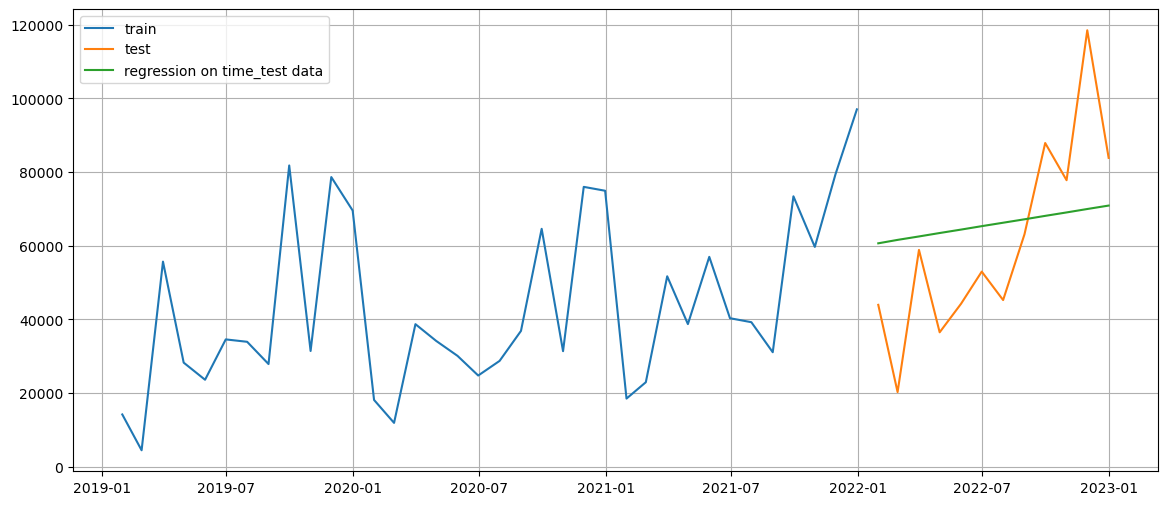

In [66]:
plt.figure(figsize = (14,6))
plt.plot(train['total'], label = 'train')
plt.plot(test['total'], label = 'test')
plt.plot(lr_test['predict'], label = 'regression on time_test data')
plt.legend(loc = 'best')
plt.grid()

Evaluasi LinearRegression

In [67]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score : {}".format(r2))
print("MSE : {}".format(mse))
print("MAE : {}".format(mae))

R2 Score : 0.15695974210782793
MSE : 560008692.4682592
MAE : 19663.551638810957


### ARIMA & ExponentialSmoothing

In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [69]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value :", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Observations used for ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [70]:
ad_test(orderdate_sales['total'])

1. ADF :  -4.493767844002668
2. P-Value : 0.00020180198458237563
3. Num of Lags :  0
4. Num of Observations used for ADF Regression and Critical Values Calculation : 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064


Figure out Order for ARIMA Model

In [71]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(orderdate_sales['total'], trace = True,
                         suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1098.402, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1091.142, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1086.023, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1096.548, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1087.981, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1088.734, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1088.580, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1084.612, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1085.789, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1085.792, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1089.631, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1087.425, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.445 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -540.306
Date:                Wed, 08 Nov 2023   AIC                           1084.612
Time:                        14:29:37   BIC                           1088.313
Sample:                    01-31-2019   HQIC                          1086.005
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6534      0.123     -5.315      0.000      -0.894      -0.412
sigma2      5.981e+08   2.21e-13    2.7e+21      0.000    5.98e+08    5.98e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.88   Prob(JB):                         0.93
Heteroskedasticity (H):               1.05   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.75e+39. Standard errors may be unstable.
"""

In [72]:
train = orderdate_sales.iloc[:36]
test = orderdate_sales.iloc[-12:]
print(train.shape, test.shape)

(36, 1) (12, 1)


In [73]:
train

,total
date,
2019-01-31,14236.8950
2019-02-28,4519.8920
2019-03-31,55691.0090
2019-04-30,28295.3450
2019-05-31,23648.2870
2019-06-30,34595.1276
2019-07-31,33946.3930
2019-08-31,27909.4685
2019-09-30,81777.3508


In [74]:
test

,total
date,
2022-01-31,43971.3740
2022-02-28,20301.1334
2022-03-31,58872.3528
2022-04-30,36521.5361
2022-05-31,44261.1102
2022-06-30,52981.7257
2022-07-31,45264.4160
2022-08-31,63120.8880
2022-09-30,87866.6520


In [84]:
model_arima = ARIMA(train['total'], order = (1,0,5))
model_fit = model_arima.fit()

C:\Users\ramaw\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ramaw\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ramaw\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [85]:
start = len(train)
end = len(train)+len(test) - 1

predict_arima = model_fit.predict(start = start, end = end, typ='levels')
print(predict_arima)

2022-01-31    56863.483664
2022-02-28    29587.710878
2022-03-31    37970.318825
2022-04-30    28436.102420
2022-05-31    29461.210964
2022-06-30    41240.353442
2022-07-31    43096.743347
2022-08-31    43389.309931
2022-09-30    43435.418351
2022-10-31    43442.685026
2022-11-30    43443.830253
2022-12-31    43444.010740
Freq: M, Name: predicted_mean, dtype: float64


<Axes: xlabel='date'>

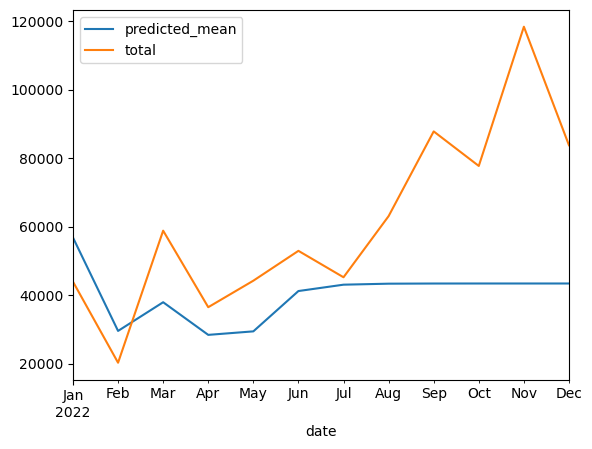

In [86]:
predict_arima.plot(legend = True)
test['total'].plot(legend = True)

In [87]:
r2 = r2_score(test['total'], predict_arima)
mse = mean_squared_error(test['total'], predict_arima)
mae = mean_absolute_error(test['total'], predict_arima)

print("R2 Score : {}".format(r2))
print("MSE : {}".format(mse))
print("MAE : {}".format(mae))
rmse = sqrt(mean_squared_error(test['total'], predict_arima))
print("RMSE : ", rmse)

R2 Score : -0.494766694641102
MSE : 992932821.8607221
MAE : 24480.120970274515
RMSE :  31510.836578242765


In [88]:
ets_model = ExponentialSmoothing(train['total'],
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

C:\Users\ramaw\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [89]:
start = len(train)
end = len(train)+len(test) - 1

In [90]:
predict = ets_model.predict(start=start, end = end)
print(predict)

2022-01-31     35256.827216
2022-02-28     37272.512169
2022-03-31     66832.115884
2022-04-30     57314.644848
2022-05-31     68572.587385
2022-06-30     52413.747928
2022-07-31     54450.821464
2022-08-31     53641.238758
2022-09-30     98545.493367
2022-10-31     78606.739997
2022-11-30    103631.558106
2022-12-31    109978.007967
Freq: M, dtype: float64


<Axes: xlabel='date'>

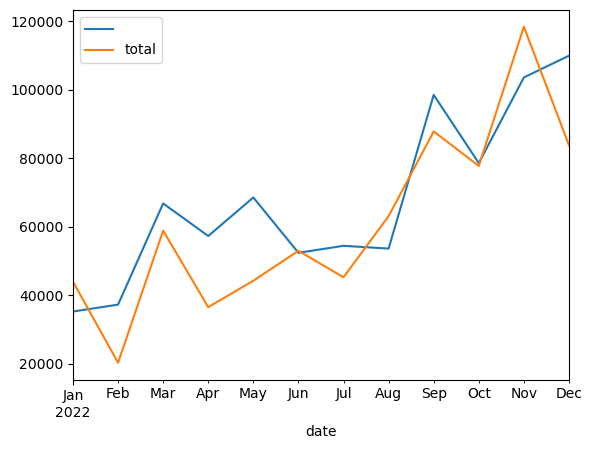

In [91]:
predict.plot(legend = True)
test['total'].plot(legend = True)

In [92]:
evaluate_model = ets_model.fittedvalues
rmse = sqrt(mean_squared_error(test['total'], predict))
print("RMSE : ", rmse)

RMSE :  14841.688185023097


In [93]:
r2 = r2_score(test['total'], predict)
mse = mean_squared_error(test['total'], predict)
mae = mean_absolute_error(test['total'], predict)

print("R2 Score : {}".format(r2))
print("MSE : {}".format(mse))
print("MAE : {}".format(mae))

R2 Score : 0.6683957011199441
MSE : 220275708.18145418
MAE : 12538.160106076926


In [94]:
forecast_years = 12
start = '2023-01-31'  # Tanggal awal prediksi
end = '2023-12-31'    # Tanggal akhir prediksi

In [95]:
forecast = ets_model.predict(start=start, end = end)

# Tampilkan hasil prediksi
print('Prediksi Penjualan Tahunan untuk', forecast_years, 'bulan ke depan:')
print(forecast)

Prediksi Penjualan Tahunan untuk 12 bulan ke depan:
2023-01-31     55899.856278
2023-02-28     57915.541231
2023-03-31     87475.144946
2023-04-30     77957.673909
2023-05-31     89215.616446
2023-06-30     73056.776990
2023-07-31     75093.850526
2023-08-31     74284.267819
2023-09-30    119188.522429
2023-10-31     99249.769058
2023-11-30    124274.587167
2023-12-31    130621.037029
Freq: M, dtype: float64


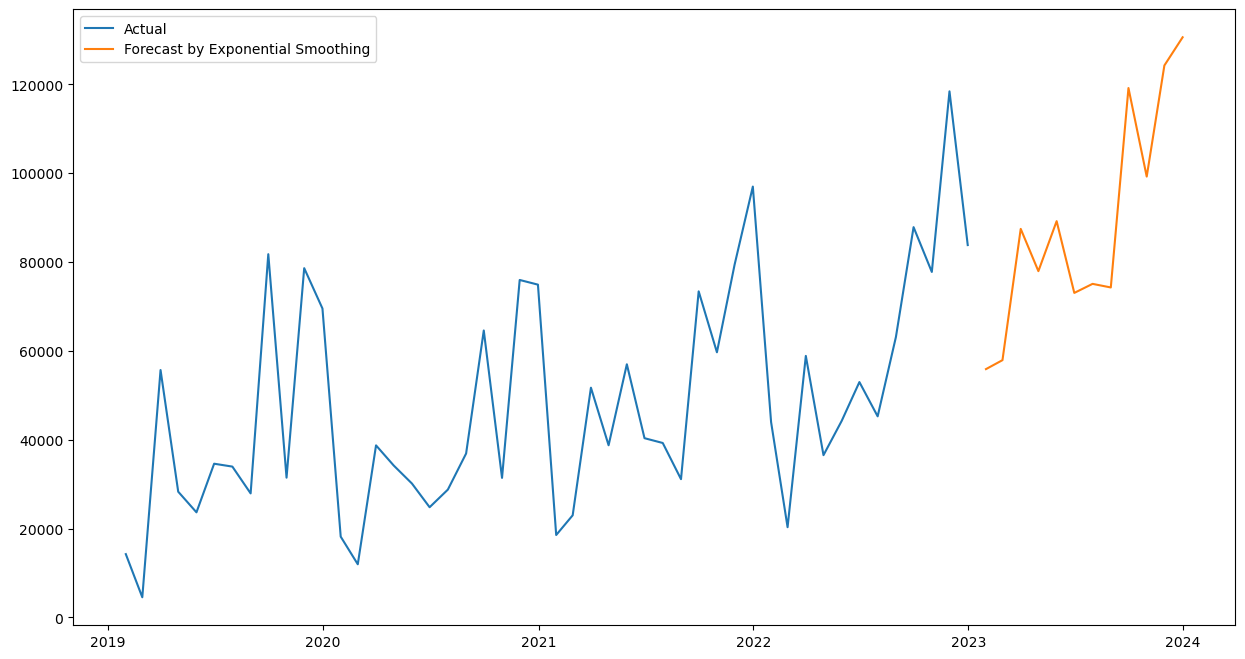

In [210]:
plt.figure(figsize = (15,8))
plt.plot(orderdate_sales['total'], label = 'Actual')
plt.plot(forecast, label = 'Forecast by Exponential Smoothing')
plt.legend(loc = 'best')
plt.show()